In [60]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make the original data and plot it

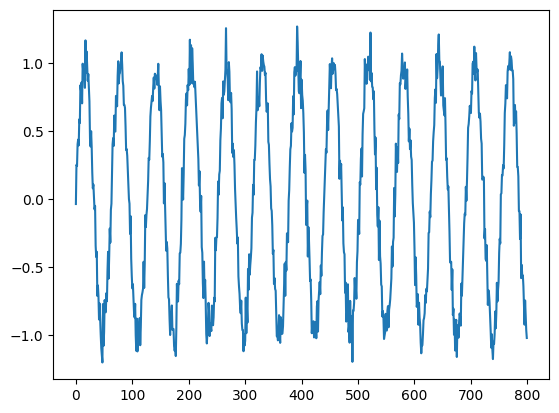

In [61]:
#                                       adding noise
series = np.sin(0.1 * np.arange(800)) + np.random.randn(800) * 0.1

plt.plot(series);

Build the dataset

In [62]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (790, 10, 1) Y.shape (790,)


Try autoregressive RNN model

In [63]:
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))


Train the model

In [64]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data=(X[-N//2:], Y[-N//2:]),
    epochs=80
)

Epoch 1/80
13/13 [==============================] - 1s 16ms/step - loss: 0.2391 - val_loss: 0.0972
Epoch 2/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0782 - val_loss: 0.0568
Epoch 3/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.0347
Epoch 4/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.0278
Epoch 5/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.0238
Epoch 6/80
13/13 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 7/80
13/13 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.0262
Epoch 8/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.0242
Epoch 9/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0217
Epoch 10/80
13/13 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.0212
Epoch 11/80
13/13 

Plot loss per iteration

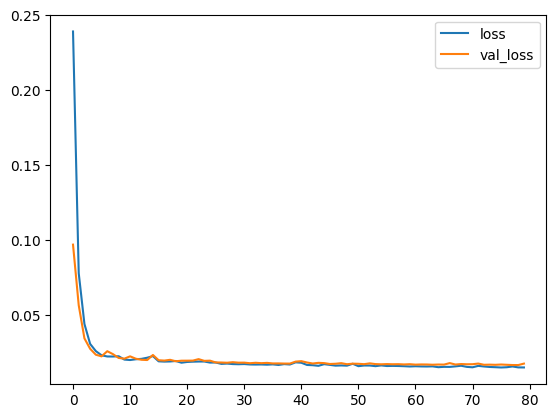

In [65]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

"WRONG" forecast using true targets

In [66]:
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N // 2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
  i += 1
  validation_predictions.append(p)

1/1 [==============================] - 0s 19ms/step


Plot the predictions of the forecast

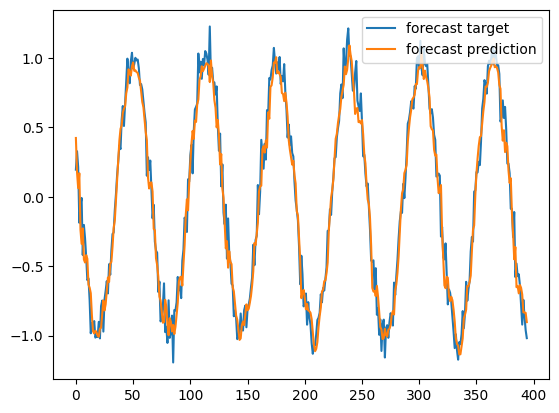

In [67]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

Forecast future values (use only self-predictions for making future predictions)

In [68]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


1/1 [==============================] - 0s 18ms/step


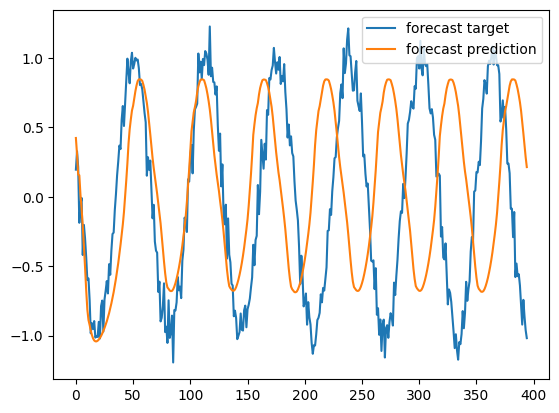

In [69]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();